## Code:

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import classification_report

In [2]:
COLUMNS = ['age','workclass', 'fnlwgt', 'education', 'education_num', 
           'marital','occupation', 'relationship', 'race', 'sex', 
           'capital_gain','capital_loss','hours_week','native_country',
           'label']

In [3]:
df_train = pd.read_csv('Adult.csv', skipinitialspace=True, names = COLUMNS, index_col=False)
df_test = pd.read_csv('Adult_Test.csv',skiprows = 1, skipinitialspace=True, names = COLUMNS, index_col=False)

In [4]:
print(df_train.shape, df_test.shape)
print(df_train.dtypes)

(32561, 15) (16281, 15)
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital           object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_week         int64
native_country    object
label             object
dtype: object


In [5]:
df_train.head()
# target-label : string categorical

,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# map the value '<=50k' with 0 otherwise 1
label = {'<=50K': 0,'>50K': 1}
df_train.label = [label[item] for item in df_train.label]
label_t = {'<=50K.': 0,'>50K.': 1}   # in sample we have <=50k. thats why
df_test.label = [label_t[item] for item in df_test.label] 

In [7]:
df_train.head()  # label modified to 0 and 1
#print(df_train.label) # print specified column of data set#

,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [8]:
df_test.head() # label change to 0 and 1

,age,workclass,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [9]:
df_train=df_train.replace('?',np.nan) # replacing ? to nan
df_train.dropna(inplace=True)        # drop na
df_test=df_test.replace('?',np.nan)
df_test.dropna(inplace=True)

In [10]:
df_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_week', 'native_country', 'label'],
      dtype='object')

In [11]:
#df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 0 to 16280
Data columns (total 15 columns):
age               15060 non-null int64
workclass         15060 non-null object
fnlwgt            15060 non-null int64
education         15060 non-null object
education_num     15060 non-null int64
marital           15060 non-null object
occupation        15060 non-null object
relationship      15060 non-null object
race              15060 non-null object
sex               15060 non-null object
capital_gain      15060 non-null int64
capital_loss      15060 non-null int64
hours_week        15060 non-null int64
native_country    15060 non-null object
label             15060 non-null int64
dtypes: int64(7), object(8)
memory usage: 1.8+ MB


In [12]:
print(df_train["label"].value_counts())
### The model will be correct in atleast 70% of the case
print(df_test["label"].value_counts())
## Unbalanced label
print(df_train.dtypes)

0    22654
1     7508
Name: label, dtype: int64
0    11360
1     3700
Name: label, dtype: int64
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital           object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_week         int64
native_country    object
label              int64
dtype: object


In [13]:
#categorical column
# workinf=g is similar to titanic dataset
cat = ['workclass', 'education', 'marital', 'occupation', 'relationship', 'race', 'sex']
for v in cat:
    #cat_list 'v' + '_'+v
    cat_list=pd.get_dummies(df_train[v],drop_first=True)
    data=df_train.join(cat_list)
    df_train=data

In [14]:
df_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_week', 'native_country', 'label', 'Local-gov',
       'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov',
       'Without-pay', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college',
       'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Widowed', 'Armed-Forces', 'Craft-repair',
       'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
       'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
       'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
       'Transport-moving', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'Asian-Pac-Islander', 'Black', 'Other', 'W

In [15]:
cat = ['workclass', 'education', 'marital', 'occupation', 'relationship', 'race', 'sex']
for v in cat:
    #cat_list 'v' + '_'+v
    cat_list=pd.get_dummies(df_test[v],drop_first=True)
    data=df_test.join(cat_list)
    df_test=data

In [16]:
df_test.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_week', 'native_country', 'label', 'Local-gov',
       'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov',
       'Without-pay', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college',
       'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Widowed', 'Armed-Forces', 'Craft-repair',
       'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
       'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
       'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
       'Transport-moving', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'Asian-Pac-Islander', 'Black', 'Other', 'W

In [17]:
df_test.drop(cat,axis=1,inplace=True)  # dropping all old columns as we have made new colums with every value of column

In [18]:
df_test.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_week', 'native_country', 'label', 'Local-gov', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', '11th',
       '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm',
       'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters',
       'Preschool', 'Prof-school', 'Some-college', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Never-married',
       'Separated', 'Widowed', 'Armed-Forces', 'Craft-repair',
       'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
       'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
       'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
       'Transport-moving', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'Asian-Pac-Islander', 'Black', 'Other', 'White',
       'Male'],
      dtype='object')

In [19]:
df_train.drop(cat,axis=1,inplace=True)

In [20]:
df_train.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_week', 'native_country', 'label', 'Local-gov', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', '11th',
       '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm',
       'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters',
       'Preschool', 'Prof-school', 'Some-college', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Never-married',
       'Separated', 'Widowed', 'Armed-Forces', 'Craft-repair',
       'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
       'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
       'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
       'Transport-moving', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'Asian-Pac-Islander', 'Black', 'Other', 'White',
       'Male'],
      dtype='object')

In [21]:
df_train.drop(['native_country'],axis=1,inplace=True)  # dropping native country( currently dont want to use it)
df_test.drop(['native_country'],axis=1,inplace=True)

In [22]:
df_train.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_week,label,Local-gov,Private,Self-emp-inc,...,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Asian-Pac-Islander,Black,Other,White,Male
0,39,77516,13,2174,0,40,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,38,215646,9,0,0,40,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [23]:
x_train=df_train.drop(['label'],axis=1)
y_train=df_train['label']

In [24]:
x_test=df_test.drop(['label'],axis=1)
y_test=df_test['label']

## ANN ( Sequential( keras( less complex then tensorflow)) - classofication

In [25]:
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

1.13.1


In [26]:
def build_model():
    # Define the model - Sequential Model 
    # Activation function - ReLU, tf.nn.sigmoid
    # mutilayer neural network in which 1st kayer has 64 input, activation function id RelU.
    # 1st layer-inpout layer 64 neurons
    # 2nd layer hidden layer
    # 3nd layer output
    # sigmoid bcx classification
     # adam optimizer works best with sigmoidactivation
    model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.sigmoid,       # layer 1 (input)
                 input_shape=[len(x_train.keys())]), #layer 2 (hideen)
    layers.Dense(64, activation=tf.nn.sigmoid),
    layers.Dense(1)   # output layer
  ])
    # Model Optimizer - To optimize loss function
    # root mean square prop
    optimizer = tf.keras.optimizers.Adamax(0.01) #tf.train.Adamoptimizer
    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 
                         'mean_squared_error'])
    return model

In [27]:
model = build_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3648      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 7,873
Trainable params: 7,873
Non-trainable params: 0
_________________________________________________________________


In [29]:
#example_batch = x_train[:10]
from sklearn.metrics import mean_squared_error
example_result = model.predict(x_train)
example_result

array([[-0.7547213],
       [-0.7945875],
       [-0.7945875],
       ...,
       [-0.7945875],
       [-0.7945873],
       [-0.7391016]], dtype=float32)

In [30]:
#train model
EPOCHS = 100
history = model.fit(
  x_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=True)

Train on 24129 samples, validate on 6033 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
24129/24129 [==============================] - 4s 152us/sample - loss: 0.1817 - mean_absolute_error: 0.3542 - mean_squared_error: 0.1817 - val_loss: 0.1804 - val_mean_absolute_error: 0.3597 - val_mean_squared_error: 0.1804
Epoch 2/100
24129/24129 [==============================] - 2s 75us/sample - loss: 0.1810 - mean_absolute_error: 0.3517 - mean_squared_error: 0.1810 - val_loss: 0.1743 - val_mean_absolute_error: 0.3349 - val_mean_squared_error: 0.1743
Epoch 3/100
24129/24129 [==============================] - 2s 84us/sample - loss: 0.1789 - mean_absolute_error: 0.3526 - mean_squared_error: 0.1789 - val_loss: 0.1814 - val_mean_absolute_error: 0.3863 - val_mean_squared_error: 0.1814
Epoch 4/100
24129/24129 [==============================] - 2s 82us/sample - loss: 0.1789 - mean_absolute_error: 0.3559 - mean_squared_error: 0.1789 - val_loss: 0.2051 - val_mean_absolute_error: 0.2914

Epoch 69/100
24129/24129 [==============================] - 2s 69us/sample - loss: 0.1831 - mean_absolute_error: 0.3660 - mean_squared_error: 0.1831 - val_loss: 0.1857 - val_mean_absolute_error: 0.3631 - val_mean_squared_error: 0.1857
Epoch 70/100
24129/24129 [==============================] - 2s 76us/sample - loss: 0.1835 - mean_absolute_error: 0.3653 - mean_squared_error: 0.1835 - val_loss: 0.1855 - val_mean_absolute_error: 0.3697 - val_mean_squared_error: 0.1855
Epoch 71/100
24129/24129 [==============================] - 2s 80us/sample - loss: 0.1833 - mean_absolute_error: 0.3653 - mean_squared_error: 0.1833 - val_loss: 0.1860 - val_mean_absolute_error: 0.3838 - val_mean_squared_error: 0.1860
Epoch 72/100
24129/24129 [==============================] - 2s 74us/sample - loss: 0.1835 - mean_absolute_error: 0.3659 - mean_squared_error: 0.1835 - val_loss: 0.1854 - val_mean_absolute_error: 0.3733 - val_mean_squared_error: 0.1854
Epoch 73/100
24129/24129 [==============================] - 

In [31]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
95,0.183069,0.365812,0.183069,0.185460,0.365541,0.185460,95
96,0.182966,0.366117,0.182966,0.186374,0.354932,0.186374,96
97,0.183259,0.365297,0.183259,0.185296,0.371831,0.185296,97
98,0.183183,0.365021,0.183183,0.185739,0.361001,0.185739,98
99,0.183141,0.366133,0.183141,0.185315,0.369592,0.185315,99


In [32]:
import matplotlib.pyplot as plt
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [label]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5]) 
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$label^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

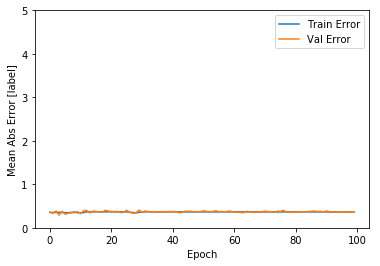

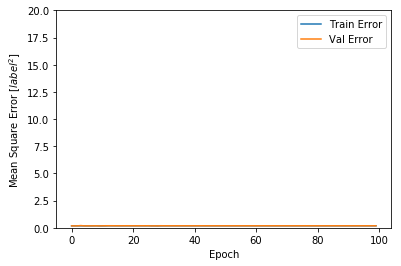

In [33]:
plot_history(history)

In [34]:
example_batch = x_test
#from sklearn.metrics import mean_squared_error
example_result = model.predict(example_batch)
#example_result
yhat=np.round(example_result)  # to make value 0 or 1 beacuase orginal label is 0 or 1

In [35]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test,yhat))
# can improve by changing value of alphs, increase learining rate
# current model is good for 0 and not good for 1

[[11360     0]
 [ 3593   107]]


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86     11360
           1       1.00      0.03      0.06      3700

   micro avg       0.76      0.76      0.76     15060
   macro avg       0.88      0.51      0.46     15060
weighted avg       0.82      0.76      0.67     15060

